# Radioactive lighthouse problem  <span style="color: red">Key</span>

Goal: Explore a classic problem from Gull (by way of Sivia's book with some tweaks).

<!-- 
<div style="float:left;"><img src="../../_images/radioactive_lighthouse_problem_figure.png" width=300px></div>
 -->
<div style="float:left;"><img src="https://raw.githubusercontent.com/buqeye/LearningFromData/main/LectureNotes/_images/radioactive_lighthouse_problem_figure.png" width=300px></div>

In the figure, a radioactive source that emits gamma rays randomly in time but uniformly in angle is placed at $(x_0, y_0)$.  The gamma rays are detected on the $x$-axis and these positions are saved, $x_k$, $k=1,2,\cdots, N$.  Given these observed positions, the problem is to estimate the location of the source.

Initially we'll assume that we know that $y_0 = 1$ (in whatever length units we are implicitly using), so our goal is to estimate $x_0$.  We introduce the angle $\theta$ between the $\gamma$ ray and the $y$-axis (with $\theta = 0$ meaning the gamma ray is detected at $x_0$).

Refs:
* D.S. Sivia, *Data Analysis, A Bayesian Tutorial*
* S.F. Gull, *Bayesian Inductive Inference and Maximum Entropy*

$% Some LaTeX definitions we'll use.
\newcommand{\pr}{\textrm{p}}
\newcommand{\xmax}{x_{0,\textrm{max}}}
\newcommand{\xmin}{x_{0,\textrm{min}}}
\newcommand{\Nmax}{N_{\textrm{max}}}$

**Answer the questions in** *italics*. **Check with your neighbors and ask for help if you get stuck or are unsure.**

&nbsp; &nbsp; 1. Claim: in the $p(\cdot|\cdot)$ notation, our goal is to find the posterior pdf $p(x_0 | \{x_k\}, y_0)$.  *How would you translate this posterior to words?*  


**The probability of $x_0$ given data $\{x_k\}$ and the value of $y_0$.**

&nbsp; &nbsp; 2. *By Bayes' theorem, how is this posterior related to $p(\{x_k\} | x_0, y_0)$, $p(x_0 | y_0)$, and $p(\{x_k\}|y_0)$?*

**Bayes' theorem says:**

<span style="color: black">
    
$$
 p(x_0 | \{x_k\}, y_0) = \frac{p(\{x_k\}| x_0, y_0)\, p(x_0| y_0)}{p(\{x_k\}| y_0)}
$$

</span>


&nbsp; &nbsp; 3. Claim: because the denominator pdf in 2. is independent of $x_0$, it is just a normalization factor for $\pr(x_0 | \{x_k\}, y_0)$, so we don't need to calculate it explicitly.  *Do you understand this?  What good is an unnormalized posterior $\pr(x_0 | \{x_k\}, y_0)$?*

**A normalization factor here is just an overall constant.  So if we imagine a plot of $\pr(x_0 | \{x_k\}, y_0)$, it merely changes the vertical scale and not the shape. You can always integrate over an unnormalized posterior to figure out Bayesian confidence intervals or the expectation value of a function of $x_0$, e.g.,**

$$
   \langle f(x_0) \rangle = \frac{\int f(x_0) \, \pr(x_0 | \{x_k\}, y_0)\, dx_0}{\int \pr(x_0 | \{x_k\}, y_0)\, dx_0}
$$

&nbsp; &nbsp; 4. Let's take for the prior pdf $\pr(x_0 | y_0)$ that

$$\pr(x_0 | y_0) = \pr(x_0) = \frac{1}{|\xmax - \xmin|} 
   \quad\mbox{for}\ \xmin < x_0 < \xmax $$
   
&nbsp; &nbsp; and zero elsewhere.  *What are we assuming?  Why is this more plausible than letting $x_0$ be anything? Why do we assume a constant pdf?  Is this pdf normalized?*

**The first equality says that $x_0$ is independent of $y_0$ and the second inequality says that $x_0$ is limited to a finite region but is equally probable in that region.  We know that $x_0$ is not anywhere in the universe; even more, we (most likely) know that it is not located very far from our detector in the $x$ direction.  We assume a constant pdf because we have no reason to prefer one position over another so this is considered a minimal assumption: "least informative" (note that if we *did* have more information about the location, we should incorporate it in the prior).  We will have further discussion about whether it really is least informative and how we might formally motivate that conclusion. This prior pdf is normalized.** 

&nbsp; &nbsp; 5. *If we assume that the $x_k$s are independent, then how is $\pr(\{x_k\}|x_0, y_0)$ simplified?  Is this a justifiable assumption?*

**To be precise, this should say assuming that the $x_k$s are *conditionally* independent given $x_0$ and $y_0$ (if we know $x_0$ and $y_0$, knowing $x_k$ tells us nothing in addition about what $x_{k'}$ might be), then** 

$$\pr(\{x_k\}|x_0, y_0) = \prod_{k=1}^{N} \pr(x_k|x_0,y_0)$$

**Yes this is justifiable because the physics of radioactive decay from a source with many emitters implies that there is no reason for the directions to be correlated.**

**Coming back to the different types of independence, a very nice explanation is from Nate Eldredge in
https://math.stackexchange.com/questions/22407/independence-and-conditional-independence-between-random-variables. Part of the answer is "Events 𝐴,𝐵 are conditionally independent given a third event 𝐶 means the following: Suppose you already know that 𝐶 has happened. Then knowing whether 𝐴 happened would not convey any further information about whether 𝐵 happened - any relevant information that might be conveyed by 𝐴 is already known to you, because you know that 𝐶 happened."  He goes on to give counterexamples that show that independence does not necessarily imply conditional independence, and conditional independence does not necessarily imply independence.**

&nbsp; &nbsp; 6. *Show that for a particular $k$,* 

$$ \pr(x_k|x_0, y_0) = \frac{y_0}{\pi} \frac{1}{y_0^2 + (x_k - x_0)^2} \;, $$

&nbsp; &nbsp; *given that the angular distribution from $\theta_k$ is uniform from $-\pi/2$ to $\pi/2$, so $\pr(\theta_k|x_0,y_0) = 1/\pi$, and also that*

$$ \pr(\theta_k|x_0, y_0)\, d\theta_k = \pr(x_k | x_0, y_0)\, dx_k \;.$$ 

&nbsp; &nbsp; *Why is the latter true?*

**Let's start with the last question.  This is true because the probability for a definite event has to be independent of how we parametrize it.  The probability of detection in a length $dx_k$ about $x_k$ is the same if we write it instead in terms of the angular interval $d\theta_k$ about $\theta_k$.** 

**Given this result,**

$$ \pr(x_k|x_0, y_0) = \frac{1}{\pi} \frac{d\theta_k}{dx_k} $$

**We relate $x_k$ and $\theta_k$ by**

$$  x_k = x_0 + y_0 \tan\theta_k$$

**so**

$$ \frac{dx_k}{d\theta_k} = \frac{y_0}{\cos^2\theta_k} \ \Longrightarrow \ \frac{d\theta_k}{dx_k} = \frac{1}{y_0}\cos^2\theta_k
    = \frac{y_0}{(x_k - x_0)^2 + y_0^2} \;,$$

**where we expressed the cosine in terms of $x_0$, $y_0$, and $x_k$ using the diagram.** 

**Putting these together we obtain the desired relation.**

&nbsp; &nbsp; 7. Ok, now we're ready to see what the estimates for $x_0$ look like. Use the following code to generate a set of random $x$ points for a Cauchy distribution.  *Look up the Stats documentation for a Cauchy distribution (google "scipy stats cauchy") to verify it is the same function derived above (note the use of `loc` and `scale`).  Run it a few times to see the fluctuations in the distribution.* 

&nbsp; &nbsp; *What can you say about the tails of this distribution compared to your experience with Gaussian distributions?*

**According to the scipy.stats.cauchy page,** `cauchy.pdf(x, loc, scale)` **is $1/\pi(1+z^2)$ with $z = (x - \mbox{loc})/\mbox{scale}$, so we get the same function with $x_0 = \mbox{loc}$ and $y_0 = \mbox{scale}$. (Do you see where the extra factor of $y_0$ comes in?)**

**The tails of this distribution are much heavier (are non-negligible much further out) than those of a Gaussian distribution with a similar half width.**

**(Note: when we implement this we really should exclude points from our distribution that would miss the detector because they have $x_k$ beyond the range of the detector.)**

In [1]:
%matplotlib inline   

import numpy as np

import scipy.stats as stats
from scipy.stats import cauchy, uniform

import matplotlib.pyplot as plt
import seaborn as sns; sns.set() # for plot formatting
#sns.set_context("talk")


maximum =  859.0496104210121
minimum =  -3408.6810512086104


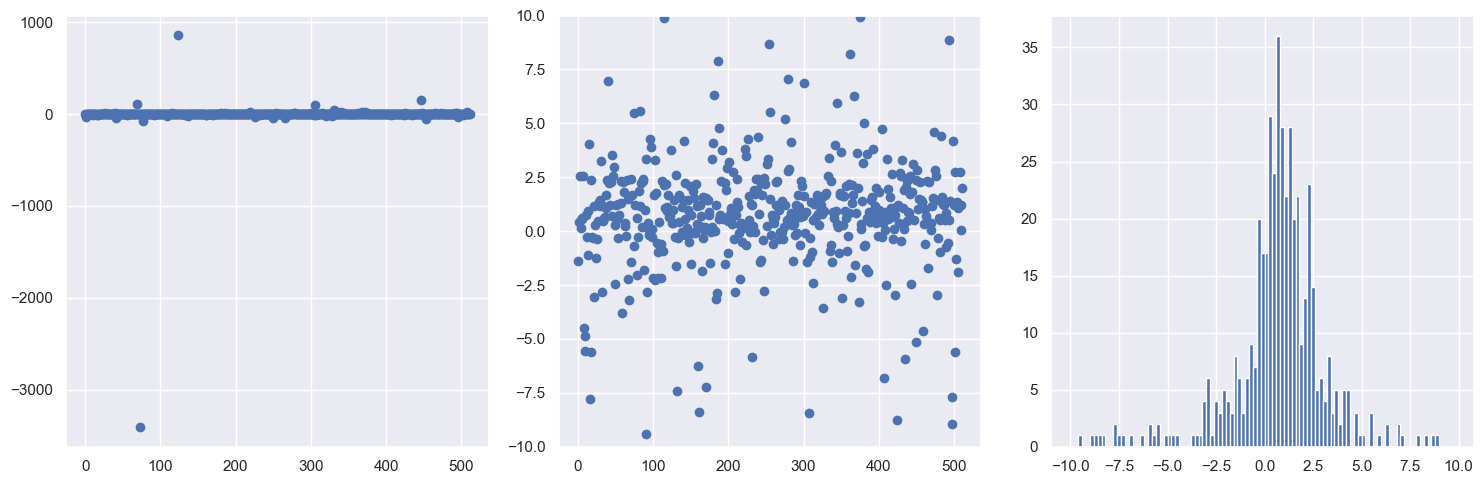

In [2]:
# True location of the radioactive source
x0_true = 1.
y0_true = 1.

# Generate num_pts random numbers distributed according to dist and plot 
num_pts = 512
x_pts = np.arange(num_pts)

# Distribution knowing where the source is: scipy.stats.cauchy(loc, scale)
dist = cauchy(x0_true, y0_true)
dist_pts = dist.rvs(num_pts)  

# Make some plots!
fig = plt.figure(figsize=(15,5))

# First plot all the points, letting it autoscale the counts
ax_1 = fig.add_subplot(1,3,1)
ax_1.scatter(x_pts, dist_pts)  

# Repeat but zoom in to near the origin
ax_2 = fig.add_subplot(1,3,2)
ax_2.scatter(x_pts, dist_pts)
ax_2.set_ylim(-10.,10.)

# Finally make a zoomed-in histogram
ax_3 = fig.add_subplot(1,3,3)
out = ax_3.hist(dist_pts, bins=np.arange(-10., 10., 0.2))

# Print out the numerical limits (max and min)
print('maximum = ', np.amax(dist_pts))
print('minimum = ', np.amin(dist_pts))

fig.tight_layout()

&nbsp; &nbsp; 8. Now you'll repeat the same graphs, but this time generate the distribution of points starting with a uniform distribution in angle between $-\pi/2$ and $\pi/2$. *In particular, at the `###`, write the formula for `dist_pts` in terms of `theta_dist` and `x0_true`, `y0_true`.*

**At the** `###` **we inserted the formula** `dist_pts_alt = x0_true + y0_true * np.tan(theta_dist.rvs(num_pts))` **which is just $x_k = x_0 + y_0 \tan\theta_k$.**

maximum =  132.9027130850004
minimum =  -415.60677660187713


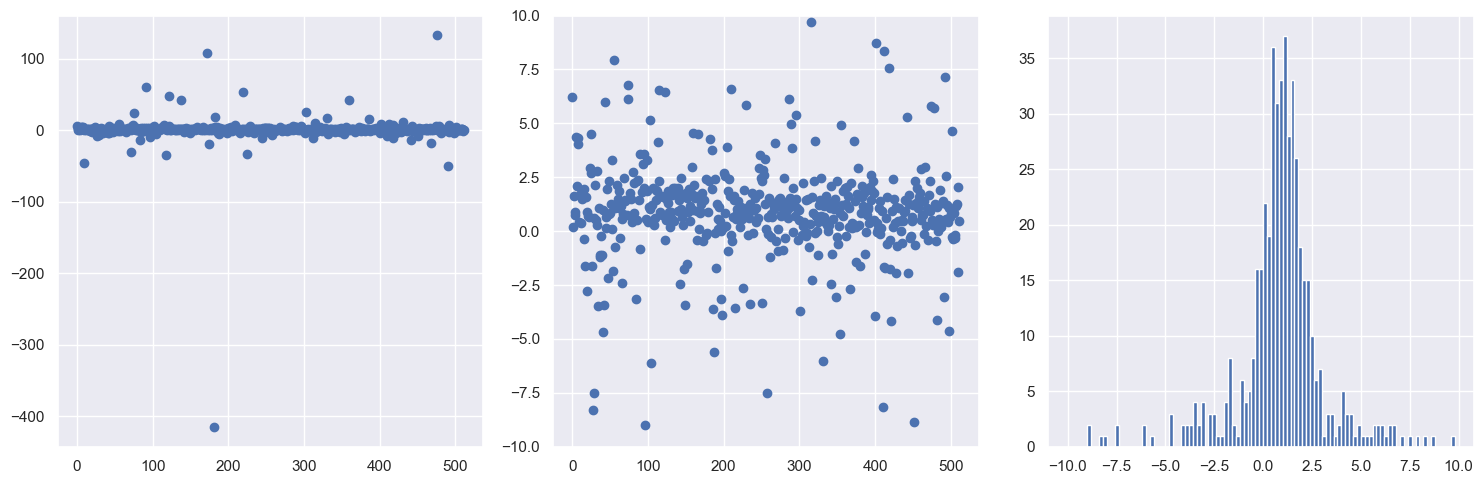

In [3]:
# True location of the radioactive source
x0_true = 1.
y0_true = 1.

# Generate num_pts random numbers distributed according to dist and plot 
num_pts = 512
x_pts = np.arange(num_pts)

# Uniform distribution in theta: uniform(a,b) in [a, a+b]
theta_dist = uniform(-np.pi/2., np.pi)

#dist_pts_alt = ### Fill in formula here for x_k points
dist_pts_alt = x0_true + y0_true * np.tan(theta_dist.rvs(num_pts))

    
    
# Make some plots!
fig = plt.figure(figsize=(15,5))

# First plot all the points, letting it autoscale the counts
ax_1 = fig.add_subplot(1,3,1)
ax_1.scatter(x_pts, dist_pts_alt)  

# Repeat but zoom in to near the origin
ax_2 = fig.add_subplot(1,3,2)
ax_2.scatter(x_pts, dist_pts_alt)
ax_2.set_ylim(-10.,10.)

# Finally make a zoomed-in histogram
ax_3 = fig.add_subplot(1,3,3)
out = ax_3.hist(dist_pts_alt, bins=np.arange(-10., 10., 0.2))

# Print out the numerical limits (max and min)
print('maximum = ', np.amax(dist_pts_alt))
print('minimum = ', np.amin(dist_pts_alt))

fig.tight_layout()

Before moving on, let's do some more plotting of histograms with different numbers of samples to build some intuition.  We define a plotting function first so it is easy to plot several histograms all at once. Run it several times to see the nature of the fluctuations.

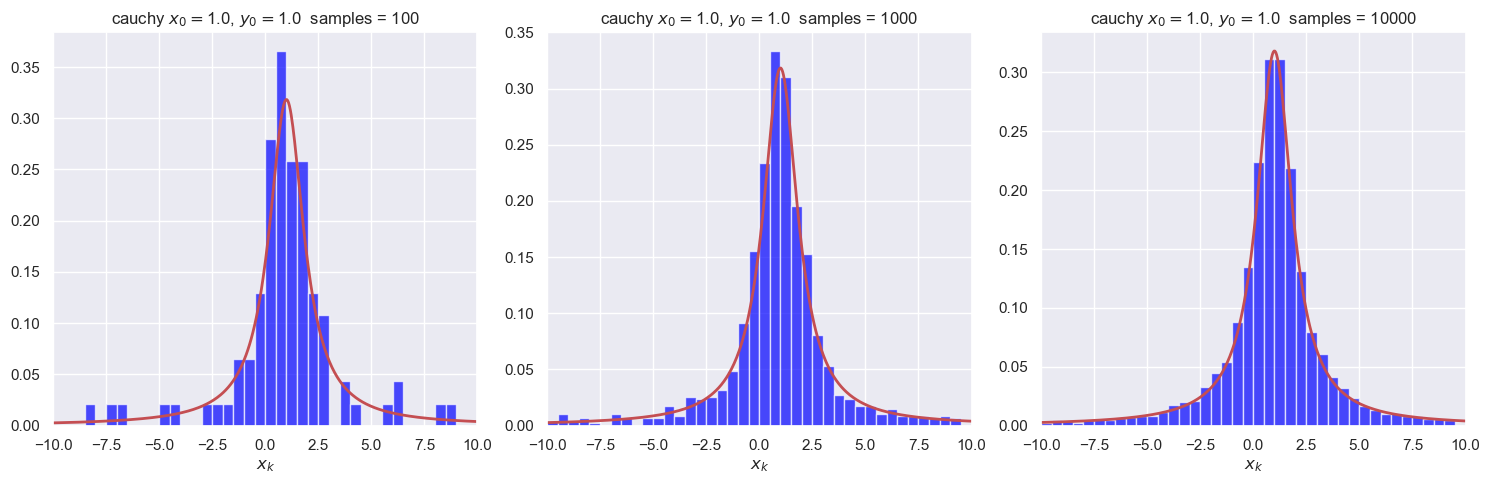

In [4]:
def dist_hist_plot(ax, name, x_dist, dist, num_samples, bin_width, 
                   x_label=None):
    """
       Plot a pdf and histogram of samples with specified list of points to 
       be plotted, which sets the range of the histogram, and width of bins.
       
       Parameters:
       -----------
       ax (matplotlib axis): axis for the histogram
       name (string): description of 
       x_dist (ndarray): points to be plotted 
       dist (scipy.stats distribution): pdf to make draws from
       num_samples (int): number of draws to make from dist
       bin_width (float): width of each bin to be plotted
       x_label (string): label for the x-axis
    """
    samples = dist.rvs(size=num_samples)   # generate num_samples draws
    bin_bounds = np.arange(x_dist[0], x_dist[-1], bin_width)
    count, bins, ignored = ax.hist(samples, bins=bin_bounds, density=True,
                                   color='blue', alpha=0.7)
    ax.plot(x_dist, dist.pdf(x_dist), linewidth=2, color='r')
    title_string = name + f'  samples = {num_samples:d}'
    ax.set_title(title_string)
    ax.set_xlim(x_dist[0], x_dist[-1])
    if x_label:
        ax.set_xlabel(x_label)
    
x_max = 10.    
x_dist = np.linspace(-x_max, x_max, 500)
name = rf'cauchy $x_0=${x0_true:1.1f}, $y_0=${y0_true:1.1f}'
fig = plt.figure(figsize=(15,5))
bin_width = 0.5
x_label = r'$x_k$'

num_samples = 100
cauchy_dist = stats.cauchy(x0_true, y0_true)
ax_1 = fig.add_subplot(1, 3, 1)
dist_hist_plot(ax_1, name, x_dist, cauchy_dist, num_samples, 
               bin_width, x_label)

num_samples = 1000
cauchy_dist = stats.cauchy(x0_true, y0_true)
ax_2 = fig.add_subplot(1, 3, 2)
dist_hist_plot(ax_2, name, x_dist, cauchy_dist, num_samples, 
               bin_width, x_label)

num_samples = 10000
cauchy_dist = stats.cauchy(x0_true, y0_true)
ax_3 = fig.add_subplot(1, 3, 3)
dist_hist_plot(ax_3, name, x_dist, cauchy_dist, num_samples, 
               bin_width, x_label)

fig.tight_layout()

**As expected intuitively, the fluctuations are much less with more points. How many samples would you consider to be a minimum number?**

## Define and plot the posterior for $x_0$

&nbsp; &nbsp; 9. In this section the posterior for $x_0$ is calculated and plotted for different numbers of data.  The prior is taken to be a uniform PDF from $-4$ to $4$ (we really don't believe it is bigger than that but otherwise we don't know what it is). For each $\Nmax$, besides plotting the posterior for $x_0$, we calculate the mean of the posterior (denoted $\langle x_0\rangle$) and the mean of the set of $\Nmax$ points (denoted $\overline x_0$). 

In [5]:
def log_prior(x0, y0_true, x_min=-4., x_max=+4.):
    """
    Log uniform prior from x_min to x_max.  Not normalized!
    """
    if (x0 > x_min) and (x0 < x_max):
        return 0.
    else:
        return -np.inf    # log(0) = -inf
    
def log_likelihood(x0, y0_true, dist_pts, N_max): 
    """
    Log likelihood for the first N_max points of the dist_pts array,
    assuming independent.  Not normalized!  
    """
    L_pts = -np.log(y0_true**2 + (dist_pts[0:N_max] - x0)**2)
    return sum(L_pts)

def posterior_calc(x0_pts, y0_true, dist_pts, N_max, x0_min=-4., x0_max=+4.):
    """
    Calculate the posterior for a set of x0_pts given y0 (y0_true) and a
    list of N_max x_k observations (dist_pts).
    """    
    log_L_pts = [log_likelihood(x0, y0_true, dist_pts, N_max) \
                 for x0 in x0_pts]
    log_L_pts -= np.amax(log_L_pts)  # subtract maximum of log likelihood

    log_prior_pts = [log_prior(x0, y0_true, x0_min, x0_max) \
                     for x0 in x0_pts]

    posterior_pts = np.exp(log_prior_pts + log_L_pts)
    return posterior_pts
  
def lighthouse_stats(dist_pts, N_max, x0_pts, posterior_pts):
    """
    Given an array of N_max observed detection points (dist_pts) and a
    posterior pdf (posterior_pts) for an array of x0 points (x0_pts), return
    the mean of dist_pts and the mode and mean of the posterior. 
    """
    mean_dist = np.mean(dist_pts[0:N_max])
    max_posterior = x0_pts[np.argmax(posterior_pts)]
    mean_posterior = np.sum(x0_pts * posterior_pts) / np.sum(posterior_pts)
    return mean_dist, max_posterior, mean_posterior

Some questions about the implementation through these functions:

* *If you wanted `log_prior` to return the normalized log prior, how would you modify the function?*
 <br>**We would return** `-np.log(x_max - x_min)` **instead of 0.  Note that** `np.inf` **is a valid Python "number".**
 <br><br>
* *Why is the log likelihood adjusted in `posterior_calc`?*
 <br>**We subtract a constant equal to its maximum value. This is the same as normalizing it so that the maximum of the likelihood is equal to 1.  By rescaling this way, we avoid too-small (or too-large) values.**
 <br><br>
* *Why is it not necessary to normalize the posterior?  Would it not be easier just to normalize it?*
 <br>**To calculate a mean we don't need to explicitly normalize. For plotting it is easier to know where the maximum is.**
 <br><br>


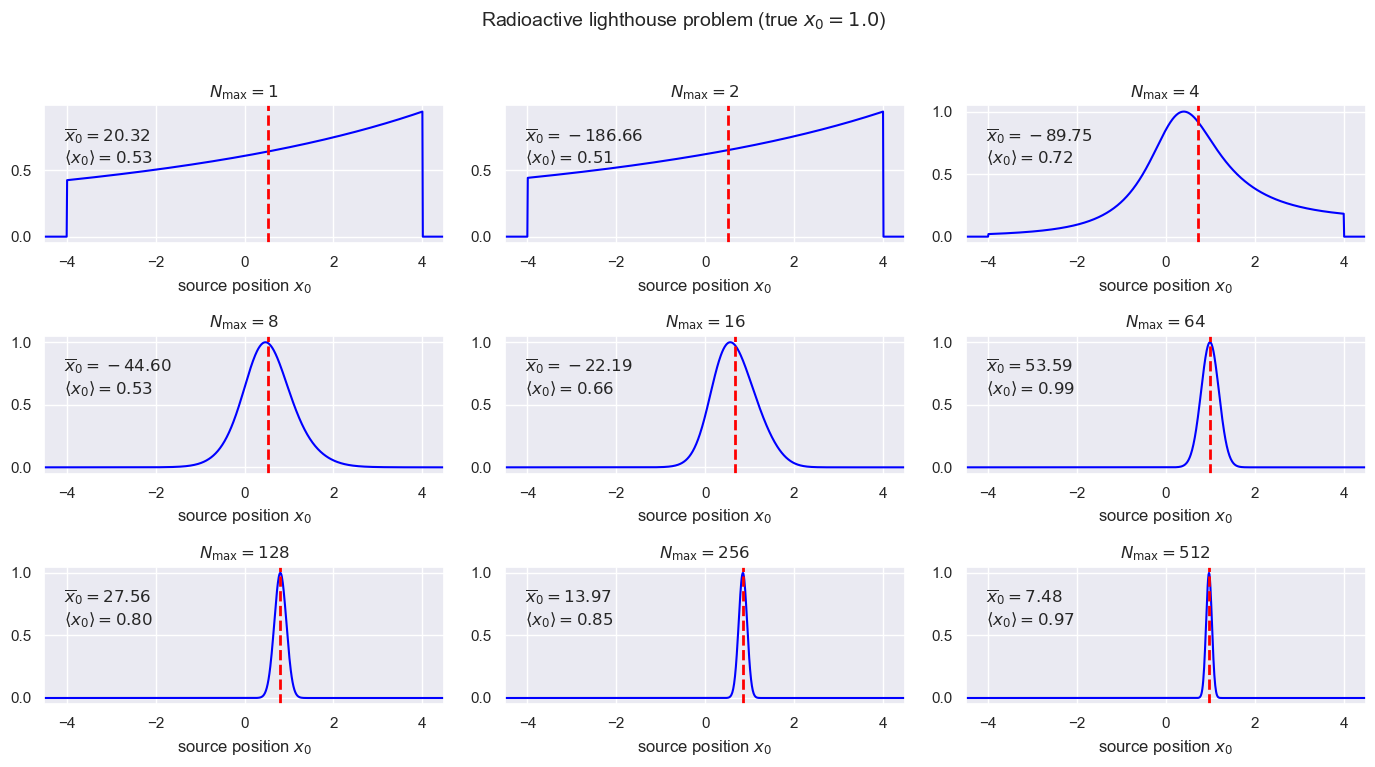

In [6]:
# True location of the radioactive source
x0_true = 1.
y0_true = 1.

# Distribution knowing where the source is: scipy.stats.cauchy(loc, scale)
num_pts = 512  # number of observations
dist = cauchy(x0_true, y0_true)   # sampling a Cauchy distribution directly
dist_pts = dist.rvs(num_pts)      # generate {x_k} for k = 1 to num_pts 

# Choose the set of N_max to be plotted (multiple of 3, up to num_pts)
N_max_values = [1, 2, 4, 8, 16, 64, 128, 256, 512]  

x0_min = -4.  # lower bound for prior
x0_max = +4.  # upper bound for prior
x0_pts = np.arange(-4.5, 4.5, 0.01)

fig = plt.figure(figsize=(14, 2.5*len(N_max_values)/3))

# Step through counter (k) for each N_max entry in N_max_values
for k, N_max in enumerate(N_max_values):  
    posterior_pts = posterior_calc(x0_pts, y0_true, dist_pts, N_max)
    mean_dist, max_posterior, mean_posterior = lighthouse_stats(dist_pts, 
                                                N_max, x0_pts, posterior_pts)
 
    # now make the plots: 3 to a row
    ax = fig.add_subplot(int(len(N_max_values)/3), 3, k+1)  
    ax.set_xlabel(r'source position $x_0$') 
    #ax.set_yticks([])  # turn off the plotting of ticks on the y-axis
    ax.plot(x0_pts, posterior_pts, color='blue')
    ax.set_title(rf'$N_{{\rm max}} = {N_max:d}$')
    ax.axvline(mean_dist, 0., 1.1, color='black', linestyle="--", lw=2)
    ax.axvline(mean_posterior, 0., 1.1, color='red', linestyle="--", lw=2)
    ax.set_xlim(np.min(x0_pts), np.max(x0_pts))
    
    stats_title = rf'$\overline{{x}}_0 = {mean_dist:.2f}$' + '\n' \
                  rf'$\langle x_0 \rangle = {mean_posterior:.2f}$'
    ax.annotate(stats_title, 
                xy=(0.05,0.85), xycoords='axes fraction', 
                horizontalalignment='left',verticalalignment='top')

figure_title = rf'Radioactive lighthouse problem (true $x_0 = {x0_true:.1f}$)'
fig.suptitle(figure_title, y=1.02, fontsize=14)

fig.tight_layout()

*Run the cell above several times for each $\Nmax$ and record the results in the table:*


In [7]:
%%html

<style> 
 table { width:90% !important; }
 table td, table th, table tr {border: 2px solid black !important; 
                               text-align:center !important;
                               font-size: 20px;}
</style>

|     $\Nmax$     | 1: $\langle x_0\rangle$ | 1: $\overline x_0$ | 2: $\langle x_0\rangle$ | 2: $\overline x_0$ | 3: $\langle x_0\rangle$ | 3: $\overline x_0$ |  
| :-------------: | :----------: | :-----------: | :-----------: | :-------------: | :----------: | :-----------: | 
|  1           |   $-0.20$     |    $-0.24$    |    $0.75$   |   $0.91$     |    $0.58$    |    $0.74$   |
|  2           |   $0.37$     |    $0.38$    |    $1.96$   |   $2.31$     |    $0.91$    |    $0.93$   |
|  4           |   $0.75$     |    $0.69$    |    $2.99$   |   $2.74$     |    $0.94$    |    $0.94$   |
|  16          |   $1.06$     |    $-6.44$    |    $0.60$   |   $0.76$     |    $0.87$    |    $1.85$   |
|  64          |   $1.16$     |    $-0.52$    |    $0.67$   |   $-1.23$     |    $1.04$    |    $1.67$   |
|  256         |   $1.04$     |    $0.73$    |    $0.92$   |   $-0.39$     |    $0.98$    |    $0.52$   |


&nbsp; &nbsp; 10. *What are your observations about the posterior for $x_0$ as a function of $\Nmax$? Which mean (from the set of $\Nmax$ points or from the posterior) is the better estimate?*

&nbsp; &nbsp; **The posterior becomes Gaussian-like, narrower like $1/\sqrt{N_{\rm max}}$.  The only reasonable estimate is from the mean of the posterior $\langle x_0 \rangle$.**
<br>
<br>

&nbsp; &nbsp; 11. *Why does the Central Limit Theorem appear to fail?*  (The mean from the set of $\Nmax$ samples does not tend to the true $x_0$.)

&nbsp; &nbsp; **The central limit does not hold here because the conditions for it to hold are violated; in particular the variance of the distribution is infinite.**
<br>
<br>

Additional tasks:
* Convert to sample the distribution using MCMC.
* Generalize to find the joint posterior of $x_0$ and $y_0$.
* (suggest something!)

**We'll come back to these!**